In [140]:
# To manipulate your data, load the following two libraries
import pandas as pd
import numpy as np

# To transform your features into new values
from sklearn import preprocessing

# Import train_test_split function
from sklearn.model_selection import train_test_split

# To construct and plot decision trees
from sklearn import tree
from matplotlib import pyplot as plt

# Import Decision Tree Classifier to predict loan approval status
from sklearn.tree import DecisionTreeClassifier

# Import Decision Tree Regressor to predict maximum loan amount
from sklearn.tree import DecisionTreeRegressor

#To optimise the Decision Tree model's hyperparameters
from sklearn.model_selection import GridSearchCV

#Import scikit-learn metrics module for classification and regression performance metrics
from sklearn import metrics

# To create and plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# To produce the classification metrics report
from sklearn.metrics import classification_report

# To create, calculate and plot the RoC curve
from sklearn.metrics import RocCurveDisplay

In [141]:
#Load dataset as df
df = pd.read_csv('/content/drive/MyDrive/Data Mining/Assignment 1/loan_approval_data.csv')
df.describe(include="all").transpose()

/tmp/ipython-input-2677938728.py:2: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Data Mining/Assignment 1/loan_approval_data.csv')


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,58645.00,NaN,NaN,NaN,29322.00,16929.50,0.00,14661.00,29322.00,43983.00,58644.00
age,58639.00,104.00,22.00,5903.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,221,2,M,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Qualifications,58645,6,Unknown,58303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,58645.00,NaN,NaN,NaN,64046.17,37931.11,4200.00,42000.00,58000.00,75600.00,1900000.00
home_ownership,58645,4,RENT,30594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emplyment_length,58645.00,NaN,NaN,NaN,4.70,4.00,0.00,2.00,4.00,7.00,150.00
loan_intent,58645,6,EDUCATION,12271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,58645.00,NaN,NaN,NaN,9217.56,5563.81,500.00,5000.00,8000.00,12000.00,35000.00
loan_interest_rate,58634.00,NaN,NaN,NaN,10.69,3.16,-11.14,7.88,10.75,12.99,150.00


In [142]:
#Check number of features and instances
df.shape

(58645, 16)

In [143]:
#Checking the first 10 instances of the data frame
df.head(10)

,id,age,Sex,Education_Qualifications,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status,max_allowed_loan,Credit_Application_Acceptance
0,35437,21.00,M,Unknown,12000,OWN,0,EDUCATION,15000,6.99,0.12,N,4,Approved,-2426900,0.00
1,53756,21.00,M,Unknown,13200,OWN,2,EDUCATION,25000,16.77,0.19,Y,3,Approved,-111739,0.00
2,42205,23.00,M,Unknown,9600,RENT,5,MEDICAL,30000,12.42,0.31,N,3,Approved,-89000,0.00
3,19180,40.00,M,Unknown,182004,RENT,3,EDUCATION,35000,8.00,0.19,N,11,Approved,35000,0.00
4,28072,40.00,M,Unknown,90000,MORTGAGE,3,HOMEIMPROVEMENT,35000,12.42,0.39,N,14,Approved,35000,0.00
5,32074,40.00,M,Unknown,131004,MORTGAGE,9,VENTURE,30000,7.90,0.23,N,13,Approved,30000,0.00
6,7224,40.00,M,Unknown,150000,MORTGAGE,9,DEBTCONSOLIDATION,25000,11.89,0.17,N,11,Approved,25000,0.00
7,14471,40.00,M,Unknown,132000,MORTGAGE,3,HOMEIMPROVEMENT,25000,16.82,0.22,N,17,Approved,25000,0.00
8,20163,40.00,M,Unknown,80000,MORTGAGE,2,DEBTCONSOLIDATION,25000,10.25,0.31,N,11,Approved,25000,0.00
9,20384,40.00,M,Unknown,80000,MORTGAGE,9,VENTURE,25000,18.67,0.30,N,17,Approved,25000,0.00


In [144]:
## Task 1
#Dropping the features we don't want
df.drop(['id', 'max_allowed_loan', 'Credit_Application_Acceptance'], axis=1, inplace=True)

In [145]:
#Display the new dataframe (since we removed 3 features, 1 was the regression target)
df.head()

,age,Sex,Education_Qualifications,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
0,21.00,M,Unknown,12000,OWN,0,EDUCATION,15000,6.99,0.12,N,4,Approved
1,21.00,M,Unknown,13200,OWN,2,EDUCATION,25000,16.77,0.19,Y,3,Approved
2,23.00,M,Unknown,9600,RENT,5,MEDICAL,30000,12.42,0.31,N,3,Approved
3,40.00,M,Unknown,182004,RENT,3,EDUCATION,35000,8.00,0.19,N,11,Approved
4,40.00,M,Unknown,90000,MORTGAGE,3,HOMEIMPROVEMENT,35000,12.42,0.39,N,14,Approved


In [146]:
## Task 2
#Display basic stats since we dropped features
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,58639.00,104.00,22.00,5903.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,221,2,M,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Qualifications,58645,6,Unknown,58303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,58645.00,NaN,NaN,NaN,64046.17,37931.11,4200.00,42000.00,58000.00,75600.00,1900000.00
home_ownership,58645,4,RENT,30594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emplyment_length,58645.00,NaN,NaN,NaN,4.70,4.00,0.00,2.00,4.00,7.00,150.00
loan_intent,58645,6,EDUCATION,12271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,58645.00,NaN,NaN,NaN,9217.56,5563.81,500.00,5000.00,8000.00,12000.00,35000.00
loan_interest_rate,58634.00,NaN,NaN,NaN,10.69,3.16,-11.14,7.88,10.75,12.99,150.00
loan_income_ratio,58645.00,NaN,NaN,NaN,0.16,0.09,0.00,0.09,0.14,0.21,0.83


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       58639 non-null  object 
 1   Sex                       221 non-null    object 
 2   Education_Qualifications  58645 non-null  object 
 3   income                    58645 non-null  int64  
 4   home_ownership            58645 non-null  object 
 5   emplyment_length          58645 non-null  int64  
 6   loan_intent               58645 non-null  object 
 7   loan_amount               58645 non-null  int64  
 8   loan_interest_rate        58634 non-null  float64
 9   loan_income_ratio         58645 non-null  float64
 10  payment_default_on_file   58640 non-null  object 
 11  credit_history_length     58645 non-null  int64  
 12  loan_approval_status      58644 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 5.8+ MB


In [148]:
df.dtypes

,0
age,object
Sex,object
Education_Qualifications,object
income,int64
home_ownership,object
emplyment_length,int64
loan_intent,object
loan_amount,int64
loan_interest_rate,float64
loan_income_ratio,float64


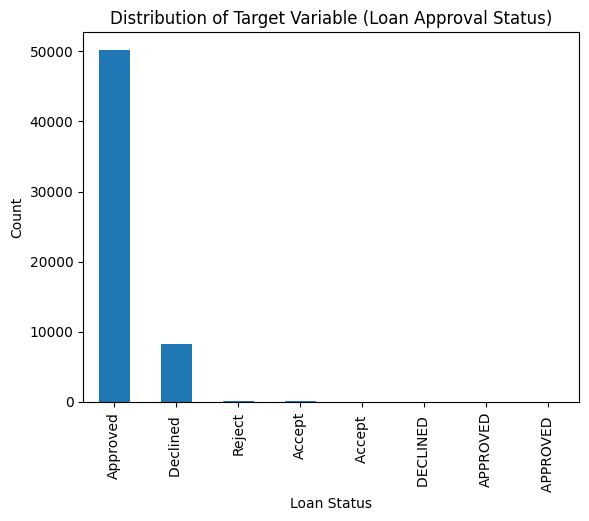

In [149]:
df['loan_approval_status'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable (Loan Approval Status)')
plt.xlabel('Loan Status'), plt.ylabel('Count')
plt.show()

In [150]:
## Task 3 a)
df.head()

,age,Sex,Education_Qualifications,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
0,21.00,M,Unknown,12000,OWN,0,EDUCATION,15000,6.99,0.12,N,4,Approved
1,21.00,M,Unknown,13200,OWN,2,EDUCATION,25000,16.77,0.19,Y,3,Approved
2,23.00,M,Unknown,9600,RENT,5,MEDICAL,30000,12.42,0.31,N,3,Approved
3,40.00,M,Unknown,182004,RENT,3,EDUCATION,35000,8.00,0.19,N,11,Approved
4,40.00,M,Unknown,90000,MORTGAGE,3,HOMEIMPROVEMENT,35000,12.42,0.39,N,14,Approved


In [151]:
df.tail()

,age,Sex,Education_Qualifications,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
58640,32,NaN,Unknown,1200000,MORTGAGE,16,DEBTCONSOLIDATION,16000,6.92,0.13,N,5,Approved
58641,32,NaN,Unknown,1200000,RENT,2,PERSONAL,10000,7.51,0.01,N,9,Approved
58642,22,NaN,Unknown,1900000,MORTGAGE,6,EDUCATION,1500,15.62,0.00,Y,3,Approved
58643,25,NaN,Unknown,1839784,RENT,0,VENTURE,8000,8.00,0.04,N,3,Approved
58644,29,NaN,Unknown,1824000,MORTGAGE,8,DEBTCONSOLIDATION,6000,13.99,0.03,N,6,Approved


In [152]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,58639.00,104.00,22.00,5903.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,221,2,M,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Qualifications,58645,6,Unknown,58303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,58645.00,NaN,NaN,NaN,64046.17,37931.11,4200.00,42000.00,58000.00,75600.00,1900000.00
home_ownership,58645,4,RENT,30594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emplyment_length,58645.00,NaN,NaN,NaN,4.70,4.00,0.00,2.00,4.00,7.00,150.00
loan_intent,58645,6,EDUCATION,12271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,58645.00,NaN,NaN,NaN,9217.56,5563.81,500.00,5000.00,8000.00,12000.00,35000.00
loan_interest_rate,58634.00,NaN,NaN,NaN,10.69,3.16,-11.14,7.88,10.75,12.99,150.00
loan_income_ratio,58645.00,NaN,NaN,NaN,0.16,0.09,0.00,0.09,0.14,0.21,0.83


In [153]:
df.describe(include='all')

,age,Sex,Education_Qualifications,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
count,58639.00,221,58645,58645.00,58645,58645.00,58645,58645.00,58634.00,58645.00,58640,58645.00,58644
unique,104.00,2,6,NaN,4,NaN,6,NaN,NaN,NaN,4,NaN,8
top,22.00,M,Unknown,NaN,RENT,NaN,EDUCATION,NaN,NaN,NaN,N,NaN,Approved
freq,5903.00,126,58303,NaN,30594,NaN,12271,NaN,NaN,NaN,49933,NaN,50210
mean,NaN,NaN,NaN,64046.17,NaN,4.70,NaN,9217.56,10.69,0.16,NaN,5.81,NaN
std,NaN,NaN,NaN,37931.11,NaN,4.00,NaN,5563.81,3.16,0.09,NaN,4.03,NaN
min,NaN,NaN,NaN,4200.00,NaN,0.00,NaN,500.00,-11.14,0.00,NaN,2.00,NaN
25%,NaN,NaN,NaN,42000.00,NaN,2.00,NaN,5000.00,7.88,0.09,NaN,3.00,NaN
50%,NaN,NaN,NaN,58000.00,NaN,4.00,NaN,8000.00,10.75,0.14,NaN,4.00,NaN
75%,NaN,NaN,NaN,75600.00,NaN,7.00,NaN,12000.00,12.99,0.21,NaN,8.00,NaN


In [154]:
df['age'].value_counts()

,count
age,
22.00,5903
23.00,5334
24.00,4063
25.00,3039
23,2392
...,...
156,1
-30,1
Twenty Seven,1


In [155]:
df['Sex'].value_counts()

,count
Sex,
M,126
F,95


In [156]:
df['Education_Qualifications'].value_counts()

,count
Education_Qualifications,
Unknown,58303
Unknown,204
Higher Education,86
High School,28
Apprenticeship,15
College,9


In [157]:
df['income'].value_counts()
#max(df['income'])
#min(df['income'])

,count
income,
60000,4164
50000,2992
30000,2200
40000,1981
70000,1876
...,...
304800,1
266000,1
109720,1


In [158]:
df['home_ownership'].value_counts()

,count
home_ownership,
RENT,30594
MORTGAGE,24824
OWN,3138
OTHER,89


In [159]:
df['emplyment_length'].value_counts()
#max(df['emplyment_length'])
#min(df['emplyment_length'])

,count
emplyment_length,
0,7586
2,7270
3,6475
5,5838
4,5461
1,5203
6,4902
7,4275
8,3015


In [160]:
df['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,12271
MEDICAL,10934
PERSONAL,10016
VENTURE,10011
DEBTCONSOLIDATION,9133
HOMEIMPROVEMENT,6280


In [161]:
df['loan_amount'].value_counts()
#max(df['loan_amount'])
#min(df['loan_amount'])

,count
loan_amount,
10000,7128
5000,5176
6000,4676
12000,4311
15000,3348
...,...
10450,1
32000,1
6775,1


In [162]:
df['loan_interest_rate'].value_counts()
#max(df['loan_interest_rate'])
#min(df['loan_interest_rate'])

,count
loan_interest_rate,
10.99,2182
7.51,2149
7.88,1758
7.49,1608
13.49,1412
...,...
15.79,1
10.68,1
6.05,1


In [163]:
df['loan_income_ratio'].value_counts()
#max(df['loan_income_ratio'])
#min(df['loan_income_ratio'])

,count
loan_income_ratio,
0.10,3248
0.13,3226
0.08,2834
0.17,2795
0.07,2725
...,...
0.83,1
0.54,1
0.63,1


In [164]:
df['payment_default_on_file'].value_counts()

,count
payment_default_on_file,
N,49933
Y,8696
NO,7
YES,4


In [165]:
df['credit_history_length'].value_counts()
#max(df['credit_history_length'])
#min(df['credit_history_length'])

,count
credit_history_length,
3,10708
2,10657
4,10566
9,3499
8,3477
7,3392
6,3391
10,3364
5,3345


In [166]:
df['loan_approval_status'].value_counts()

,count
loan_approval_status,
Approved,50210
Declined,8268
Reject,78
Accept,58
Accept,21
DECLINED,4
APPROVED,3
APPROVED,2


In [167]:
df.shape

(58645, 13)

In [168]:
## Task 3 b)
df.dtypes
#df.describe()

,0
age,object
Sex,object
Education_Qualifications,object
income,int64
home_ownership,object
emplyment_length,int64
loan_intent,object
loan_amount,int64
loan_interest_rate,float64
loan_income_ratio,float64


In [169]:
# Variable age before cleaning
#df['age'].describe()
#df['age'].min(), df['age'].max()
df['age'].value_counts()
df.describe(include='all')

,age,Sex,Education_Qualifications,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
count,58639.00,221,58645,58645.00,58645,58645.00,58645,58645.00,58634.00,58645.00,58640,58645.00,58644
unique,104.00,2,6,NaN,4,NaN,6,NaN,NaN,NaN,4,NaN,8
top,22.00,M,Unknown,NaN,RENT,NaN,EDUCATION,NaN,NaN,NaN,N,NaN,Approved
freq,5903.00,126,58303,NaN,30594,NaN,12271,NaN,NaN,NaN,49933,NaN,50210
mean,NaN,NaN,NaN,64046.17,NaN,4.70,NaN,9217.56,10.69,0.16,NaN,5.81,NaN
std,NaN,NaN,NaN,37931.11,NaN,4.00,NaN,5563.81,3.16,0.09,NaN,4.03,NaN
min,NaN,NaN,NaN,4200.00,NaN,0.00,NaN,500.00,-11.14,0.00,NaN,2.00,NaN
25%,NaN,NaN,NaN,42000.00,NaN,2.00,NaN,5000.00,7.88,0.09,NaN,3.00,NaN
50%,NaN,NaN,NaN,58000.00,NaN,4.00,NaN,8000.00,10.75,0.14,NaN,4.00,NaN
75%,NaN,NaN,NaN,75600.00,NaN,7.00,NaN,12000.00,12.99,0.21,NaN,8.00,NaN


In [170]:
# Converting valid values to float and invalid values to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Setting a range to find all unrealistic numbers (such as -30 and 156) and changing them to NaN
df.loc[(df['age']<18) | (df['age']>95),'age'] = None

# Drop NaN values
df = df.dropna(subset=['age'])

# Variable age after cleaning.
df['age'].describe(include='all').round(2)

#df['age'].isna().sum()

,age
count,58633.00
mean,27.55
std,6.02
min,20.00
25%,23.00
50%,26.00
75%,30.00
max,84.00


In [171]:
df['age'].dtypes

dtype('float64')

In [172]:
# Variable Sex before cleaning
df['Sex'].describe()

,Sex
count,221
unique,2
top,M
freq,126


In [173]:
# Variable Sex after cleaning (drop column)
df=df.drop(columns=['Sex'], axis =1)
df.columns

Index(['age', 'Education_Qualifications', 'income', 'home_ownership',
       'emplyment_length', 'loan_intent', 'loan_amount', 'loan_interest_rate',
       'loan_income_ratio', 'payment_default_on_file', 'credit_history_length',
       'loan_approval_status'],
      dtype='object')

In [174]:
# Variable Education_Qualifications before cleaning
df['Education_Qualifications'].describe()

,Education_Qualifications
count,58633
unique,6
top,Unknown
freq,58291


In [175]:
# Variable Education_Qualifications after cleaning (drop column)
df=df.drop(columns=['Education_Qualifications'], axis =1)
df.columns

Index(['age', 'income', 'home_ownership', 'emplyment_length', 'loan_intent',
       'loan_amount', 'loan_interest_rate', 'loan_income_ratio',
       'payment_default_on_file', 'credit_history_length',
       'loan_approval_status'],
      dtype='object')

In [176]:
# Variable home_ownership before cleaning
df.filter(like='home_ownership')

,home_ownership
0,OWN
1,OWN
2,RENT
3,RENT
4,MORTGAGE
...,...
58640,MORTGAGE
58641,RENT
58642,MORTGAGE
58643,RENT


In [177]:
# Variable home_ownership after cleaning (one-hot encoding)
df = pd.get_dummies(df, columns=['home_ownership'])

df.filter(like='home_ownership')


,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,False,False,True,False
1,False,False,True,False
2,False,False,False,True
3,False,False,False,True
4,True,False,False,False
...,...,...,...,...
58640,True,False,False,False
58641,False,False,False,True
58642,True,False,False,False
58643,False,False,False,True


In [178]:
# Variable emplyment_length before cleaning
df['emplyment_length'].value_counts().sort_index().tail(10)
df['emplyment_length'].describe().round(2)

,emplyment_length
count,58633.00
mean,4.70
std,4.00
min,0.00
25%,2.00
50%,4.00
75%,7.00
max,150.00


In [179]:
# Variable emplyment_length after cleaning (setting all values less than 0 and above 75 to NaN, and then removing them)

df.loc[(df['emplyment_length']<0) | (df['emplyment_length']>75), 'emplyment_length'] = None

df = df.dropna(subset=['emplyment_length'])

df['emplyment_length'].describe().round(2)

#df['emplyment_length'].isna().sum()

,emplyment_length
count,58630.00
mean,4.70
std,3.90
min,0.00
25%,2.00
50%,4.00
75%,7.00
max,41.00


In [180]:
# Variable loan_intent before cleaning
df.filter(like='loan_intent')

,loan_intent
0,EDUCATION
1,EDUCATION
2,MEDICAL
3,EDUCATION
4,HOMEIMPROVEMENT
...,...
58640,DEBTCONSOLIDATION
58641,PERSONAL
58642,EDUCATION
58643,VENTURE


In [181]:
# Variable loan_intent after cleaning (one-hot encoding)
df = pd.get_dummies(df, columns=['loan_intent'])

df.filter(like='loan_intent')

,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,False,True,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,True,False,False
3,False,True,False,False,False,False
4,False,False,True,False,False,False
...,...,...,...,...,...,...
58640,True,False,False,False,False,False
58641,False,False,False,False,True,False
58642,False,True,False,False,False,False
58643,False,False,False,False,False,True


In [182]:
# Variable loan_interest_rate before cleaning
df['loan_interest_rate'].describe().round(2)
df['loan_interest_rate'].isna().sum()

np.int64(11)

In [183]:
# Variable loan_interest_rate after cleaning (setting all values less than 0 and above 50 to NaN, and then removing them)
df.loc[(df['loan_interest_rate']<0) | (df['loan_interest_rate']>50), 'loan_interest_rate'] = None

df = df.dropna(subset=['loan_interest_rate'])

df['loan_interest_rate'].describe().round(2)
df['loan_interest_rate'].isna().sum()

np.int64(0)

In [184]:
# Variable payment_default_on_file before cleaning
df['payment_default_on_file'].value_counts(dropna=False)
df['payment_default_on_file'].describe()
df.filter(like='payment_default_on_file')

,payment_default_on_file
0,N
1,Y
2,N
3,N
4,N
...,...
58640,N
58641,N
58642,Y
58643,N


In [185]:
# Variable payment_default_on_file after cleaning
#(standardising other values to either Y, or N)
df['payment_default_on_file']=df['payment_default_on_file'].replace({'YES': 'Y','NO': 'N'})

# Remove NaN values
df = df.dropna(subset=['payment_default_on_file'])

# Encode categorical values so they are binary.
df['payment_default_on_file']=df['payment_default_on_file'].map({'Y':1, 'N':0})

df.filter(like='payment_default_on_file')

df['payment_default_on_file'].value_counts(dropna=False)

#df['payment_default_on_file'].isna().sum()

,count
payment_default_on_file,
0,49911
1,8696


In [186]:
# Variable loan_approval_status before cleaning
df['loan_approval_status'].value_counts(dropna=False)

,count
loan_approval_status,
Approved,50182
Declined,8259
Reject,77
Accept,58
Accept,21
DECLINED,4
APPROVED,3
APPROVED,2
NaN,1


In [187]:
# Variable loan_approval_status after cleaning

# Make all values lowercase and removing any unwanted characters from the before and after the word.
df['loan_approval_status']=df['loan_approval_status'].str.lower().str.strip()

# Standardising other values to either Approved, or Declined
df['loan_approval_status']=df['loan_approval_status'].replace({'accept': 'Approved','approved': 'Approved','reject': 'Declined','declined': 'Declined'})

# Remove the instance where there is no value sinces it is a part of our target variable and we dont want to risk bias by implementing the mode.
df=df.dropna(subset=['loan_approval_status'])

# Encode categorical values so they are binary.
df['loan_approval_status']=df['loan_approval_status'].map({'Approved': 0,'Declined': 1})

df['loan_approval_status'].value_counts(dropna=False)

,count
loan_approval_status,
0,50266
1,8340


In [188]:
# All numerial values before scaling.
df.head()
df.describe().round(2)

,age,income,emplyment_length,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
count,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00
mean,27.55,64049.85,4.70,9216.85,10.68,0.16,0.15,5.81,0.14
std,6.02,37933.79,3.90,5563.57,3.04,0.09,0.36,4.03,0.35
min,20.00,4200.00,0.00,500.00,5.42,0.00,0.00,2.00,0.00
25%,23.00,42000.00,2.00,5000.00,7.88,0.09,0.00,3.00,0.00
50%,26.00,58000.00,4.00,8000.00,10.75,0.14,0.00,4.00,0.00
75%,30.00,75600.00,7.00,12000.00,12.99,0.21,0.00,8.00,0.00
max,84.00,1900000.00,41.00,35000.00,35.80,0.83,1.00,30.00,1.00


In [189]:
# All numerical values after scaling.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_features = ['age', 'income', 'emplyment_length', 'loan_amount', 'loan_interest_rate', 'loan_income_ratio', 'credit_history_length']

df[numerical_features]= scaler.fit_transform(df[numerical_features])

df.head()
df.describe().round(2)

,age,income,emplyment_length,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
count,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00
mean,0.00,0.00,0.00,0.00,-0.00,-0.00,0.15,0.00,0.14
std,1.00,1.00,1.00,1.00,1.00,1.00,0.36,1.00,0.35
min,-1.25,-1.58,-1.20,-1.57,-1.73,-1.74,0.00,-0.95,0.00
25%,-0.76,-0.58,-0.69,-0.76,-0.92,-0.75,0.00,-0.70,0.00
50%,-0.26,-0.16,-0.18,-0.22,0.02,-0.21,0.00,-0.45,0.00
75%,0.41,0.30,0.59,0.50,0.76,0.55,0.00,0.54,0.00
max,9.38,48.40,9.31,4.63,8.27,7.32,1.00,6.00,1.00


In [190]:
df.shape
df.describe().round(2)

,age,income,emplyment_length,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
count,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00
mean,0.00,0.00,0.00,0.00,-0.00,-0.00,0.15,0.00,0.14
std,1.00,1.00,1.00,1.00,1.00,1.00,0.36,1.00,0.35
min,-1.25,-1.58,-1.20,-1.57,-1.73,-1.74,0.00,-0.95,0.00
25%,-0.76,-0.58,-0.69,-0.76,-0.92,-0.75,0.00,-0.70,0.00
50%,-0.26,-0.16,-0.18,-0.22,0.02,-0.21,0.00,-0.45,0.00
75%,0.41,0.30,0.59,0.50,0.76,0.55,0.00,0.54,0.00
max,9.38,48.40,9.31,4.63,8.27,7.32,1.00,6.00,1.00


In [191]:
#Saving the classification dataset under the name loan_approval_status_data_cleaned
df.to_csv(r'/content/loan_approval_status_data_cleaned.csv', index=False)

In [192]:
## Task 4)

In [193]:
df_loan_status = pd.read_csv('/content/loan_approval_status_data_cleaned.csv')
df_loan_status.head()

,age,income,emplyment_length,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,-1.09,-1.37,-1.20,1.04,-1.21,-0.43,0,-0.45,0,False,False,True,False,False,True,False,False,False,False
1,-1.09,-1.34,-0.69,2.84,2.01,0.34,1,-0.70,0,False,False,True,False,False,True,False,False,False,False
2,-0.76,-1.44,0.08,3.74,0.57,1.64,0,-0.70,0,False,False,False,True,False,False,False,True,False,False
3,2.07,3.11,-0.44,4.63,-0.88,0.34,0,1.29,0,False,False,False,True,False,True,False,False,False,False
4,2.07,0.68,-0.44,4.63,0.57,2.52,0,2.03,0,True,False,False,False,False,False,True,False,False,False


In [194]:
 # The inputs are all the features on the x-axis except for the target variable
X = df_loan_status.drop(['loan_approval_status'], axis=1)

# The target variable is assigned to y
y = df_loan_status['loan_approval_status']

# Split the dataset in 80% Training and 20% Test with class stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

# Importing the classes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

## instantiate the model using default parameters
# Building the models
NB_clf = GaussianNB()
LR_clf = LogisticRegression(random_state=30)
RF_clf = RandomForestClassifier(random_state=30)

# Train the models
NB_clf.fit(X_train, y_train)
LR_clf.fit(X_train, y_train)
RF_clf.fit(X_train, y_train)

# Run the model and store the predicted values
NB_pred = NB_clf.predict(X_test)
LR_pred = LR_clf.predict(X_test)
RF_pred = RF_clf.predict(X_test)

# View the predicted values
NB_pred
LR_pred
RF_pred

array([0, 0, 0, ..., 1, 0, 1])

In [195]:
# Features used for the model
for features in X.columns:
    print(features)

# Shape of datasets
print('\nShape of datasets:')
print('Whole Data shape',df_loan_status.shape)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

age
income
emplyment_length
loan_amount
loan_interest_rate
loan_income_ratio
payment_default_on_file
credit_history_length
home_ownership_MORTGAGE
home_ownership_OTHER
home_ownership_OWN
home_ownership_RENT
loan_intent_DEBTCONSOLIDATION
loan_intent_EDUCATION
loan_intent_HOMEIMPROVEMENT
loan_intent_MEDICAL
loan_intent_PERSONAL
loan_intent_VENTURE

Shape of datasets:
Whole Data shape (58606, 19)
X_train shape: (46884, 18)
X_test shape: (11722, 18)


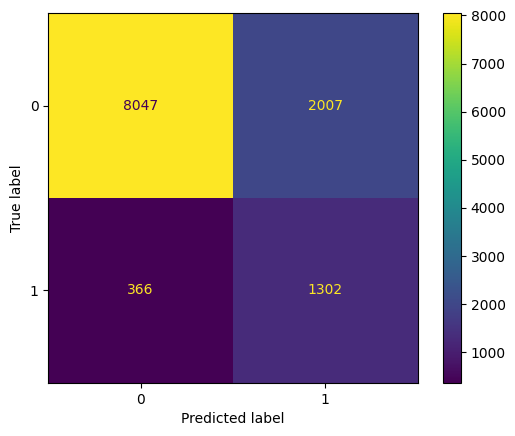

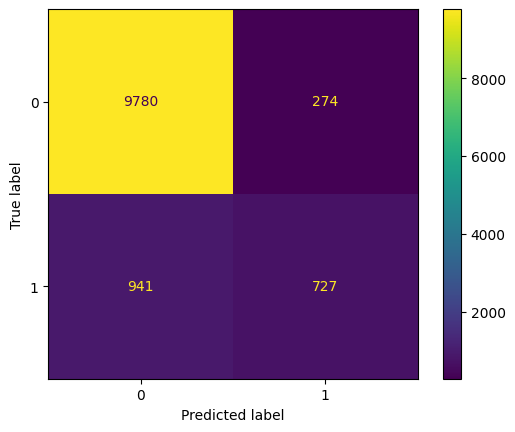

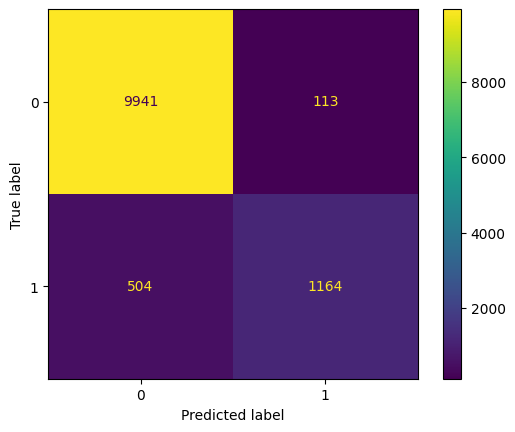

In [196]:
## Task 5 a)
# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Construct the confusion matrix cm
NB_cm = confusion_matrix(y_test, NB_pred, labels=NB_clf.classes_)
LR_cm = confusion_matrix(y_test, LR_pred, labels=LR_clf.classes_)
RF_cm = confusion_matrix(y_test, RF_pred, labels=RF_clf.classes_)

# Create a display to plot the confusion matrix
NB_disp = ConfusionMatrixDisplay(NB_cm,display_labels=NB_clf.classes_)
LR_disp = ConfusionMatrixDisplay(LR_cm,display_labels=LR_clf.classes_)
RF_disp = ConfusionMatrixDisplay(RF_cm,display_labels=RF_clf.classes_)

# Plot the confusion matrix
NB_disp.plot()
LR_disp.plot()
RF_disp.plot()

Naive Bayes report 
               precision    recall  f1-score   support

           0       0.96      0.80      0.87     10054
           1       0.39      0.78      0.52      1668

    accuracy                           0.80     11722
   macro avg       0.67      0.79      0.70     11722
weighted avg       0.88      0.80      0.82     11722

Logistic Regression report 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     10054
           1       0.73      0.44      0.54      1668

    accuracy                           0.90     11722
   macro avg       0.82      0.70      0.74     11722
weighted avg       0.89      0.90      0.89     11722

Random Forest report 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     10054
           1       0.91      0.70      0.79      1668

    accuracy                           0.95     11722
   macro avg       0.93      0.84      0.88     11722
w

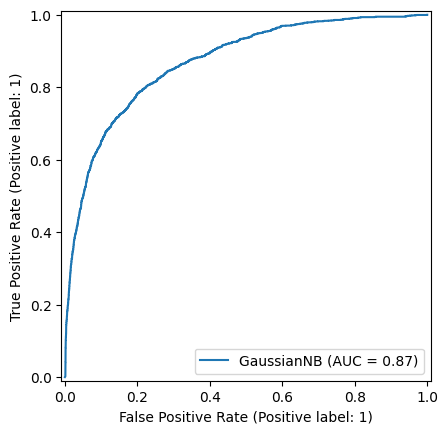

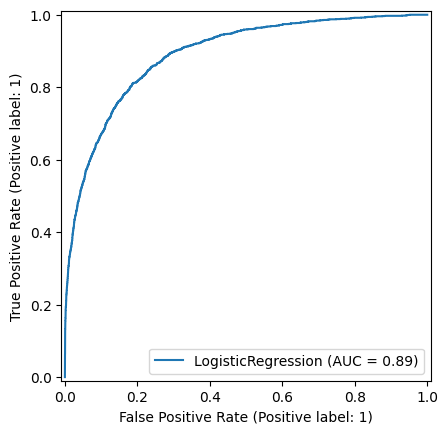

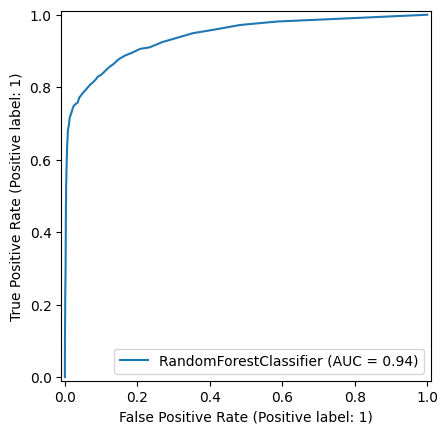

In [197]:
## Task 5 b)
from sklearn.metrics import classification_report

# Produce the Naive Bayes classification report for test
print("Naive Bayes report \n", classification_report(y_test, NB_pred))
# Plot the ROC curve for Naive Bayes clf
NB_clf_Roc = RocCurveDisplay.from_estimator(NB_clf, X_test, y_test)

# Produce the Logistic Regression classification report for test
print("Logistic Regression report \n", classification_report(y_test, LR_pred))
# Plot the ROC curve for Logistic Regression clf
LR_clf_Roc = RocCurveDisplay.from_estimator(LR_clf, X_test, y_test)

# Produce the Random Forest classification report for test
print("Random Forest report \n", classification_report(y_test, RF_pred))
# Plot the ROC curve for Random Forest clf
RF_clf_Roc = RocCurveDisplay.from_estimator(RF_clf, X_test, y_test)

In [198]:
## Task 5 d)
# Produce the Random Forest classification report for train
RF_train_pred = RF_clf.predict(X_train)
print("Random Forest report using train data\n", classification_report(y_train, RF_train_pred))

# Produce the Random Forest classification report for test
print("Random Forest report using test data \n", classification_report(y_test, RF_pred))

Random Forest report using train data
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     40212
           1       1.00      1.00      1.00      6672

    accuracy                           1.00     46884
   macro avg       1.00      1.00      1.00     46884
weighted avg       1.00      1.00      1.00     46884

Random Forest report using test data 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     10054
           1       0.91      0.70      0.79      1668

    accuracy                           0.95     11722
   macro avg       0.93      0.84      0.88     11722
weighted avg       0.95      0.95      0.94     11722



In [199]:
## Task 5 e)
#create a new random forest classifier
rf = RandomForestClassifier(random_state=30)

#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'max_features': ['sqrt', 'log2']}

#use gridsearch to test all values
rf_gs = GridSearchCV(rf, params_rf, cv=5, n_jobs = -1)

# fit model to training data
rf_gs.fit(X_train, y_train)

# save best model
rf_best = rf_gs.best_estimator_

# check best values
print(rf_gs.best_params_)

# make prediction on the test data
y_pred_rf = rf_best.predict(X_test)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [200]:
# Before tuning hyperparameters values
params_before_tuning = {'max_depth': RF_clf.max_depth, 'max_features': RF_clf.max_features, 'min_samples_split': RF_clf.min_samples_split, 'n_estimators': RF_clf.n_estimators}
print(params_before_tuning)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 100}


confusion_matrix for RF after tuning


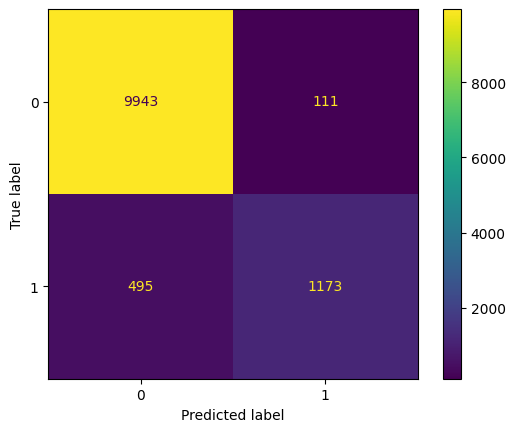

In [201]:
## Task 5 e) iii.
print("confusion_matrix for RF after tuning")
best_rf_cm=confusion_matrix(y_test,y_pred_rf)
disp=ConfusionMatrixDisplay(confusion_matrix=best_rf_cm,display_labels = rf_best.classes_)
disp.plot()

In [202]:
## Task 5 e) iv
print("Classification report for RF after tuning")
print(classification_report(y_test,y_pred_rf))

Classification report for RF after tuning
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10054
           1       0.91      0.70      0.79      1668

    accuracy                           0.95     11722
   macro avg       0.93      0.85      0.88     11722
weighted avg       0.95      0.95      0.95     11722



In [203]:
### PART B

In [204]:
pd.options.display.float_format = '{:.2f}'.format

# Creating the regression dataset using the original csv file with all the data
df2 = pd.read_csv('/content/drive/MyDrive/Data Mining/Assignment 1/loan_approval_data.csv')

# Check values in Credit Application Acceptance
df2['Credit_Application_Acceptance'].value_counts(dropna=False)

# Remove the instance where there is no value from Credit Application Acceptance
df2=df2.dropna(subset=['Credit_Application_Acceptance'])

# Check NaN value has been dropped successfully
df2['Credit_Application_Acceptance'].value_counts(dropna=False)

# Remove all applicants who were declined a loan.
approved_loan_applicants =  df2[(df2.Credit_Application_Acceptance < 1)]

# Checking basic stats to see if all applicants who were declined a loan have been removed successfully.
approved_loan_applicants.describe().transpose()

# Drop the Credit Application Acceptance and loan_approval_status variable from the data frame
approved_loan_applicants.drop('loan_approval_status',axis=1, inplace=True)
approved_loan_applicants.drop('Credit_Application_Acceptance',axis=1, inplace=True)
#approved_loan_applicants.head()

/tmp/ipython-input-1273981973.py:4: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/drive/MyDrive/Data Mining/Assignment 1/loan_approval_data.csv')
/tmp/ipython-input-1273981973.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approved_loan_applicants.drop('loan_approval_status',axis=1, inplace=True)
/tmp/ipython-input-1273981973.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approved_loan_applicants.drop('Credit_Application_Acceptance',axis=1, inplace=True)


In [205]:
# Cleaning the rest of the data

#Dropping the features we don't want (Part of Task 1)
approved_loan_applicants.drop(['id'], axis=1, inplace=True)

# Variable age cleaning
approved_loan_applicants['age'] = pd.to_numeric(approved_loan_applicants['age'], errors='coerce')
approved_loan_applicants.loc[(approved_loan_applicants['age']<18) | (approved_loan_applicants['age']>95),'age'] = None
approved_loan_applicants = approved_loan_applicants.dropna(subset=['age'])

# Variable Sex cleaning
approved_loan_applicants=approved_loan_applicants.drop(columns=['Sex'], axis =1)

# Variable Education_Qualifications cleaning
approved_loan_applicants=approved_loan_applicants.drop(columns=['Education_Qualifications'], axis =1)

# Variable home_ownership cleaning (one-hot encoding)
approved_loan_applicants = pd.get_dummies(approved_loan_applicants, columns=['home_ownership'])

# Variable emplyment_length cleaning (setting all values less than 0 and above 75 to NaN, and then removing them)
approved_loan_applicants.loc[(approved_loan_applicants['emplyment_length']<0) | (approved_loan_applicants['emplyment_length']>75), 'emplyment_length'] = None
approved_loan_applicants = approved_loan_applicants.dropna(subset=['emplyment_length'])

# Variable loan_intent cleaning (one-hot encoding)
approved_loan_applicants = pd.get_dummies(approved_loan_applicants, columns=['loan_intent'])

# Variable loan_interest_rate cleaning (setting all values less than 0 and above 50 to NaN, and then removing them)
approved_loan_applicants.loc[(approved_loan_applicants['loan_interest_rate']<0) | (approved_loan_applicants['loan_interest_rate']>50), 'loan_interest_rate'] = None
approved_loan_applicants = approved_loan_applicants.dropna(subset=['loan_interest_rate'])

# Variable payment_default_on_file cleaning - standardising, removing NaN values and encoding
approved_loan_applicants['payment_default_on_file']=approved_loan_applicants['payment_default_on_file'].replace({'YES': 'Y','NO': 'N'})
approved_loan_applicants = approved_loan_applicants.dropna(subset=['payment_default_on_file'])
approved_loan_applicants['payment_default_on_file']=approved_loan_applicants['payment_default_on_file'].map({'Y':1, 'N':0})

# Target variable max_allowed_loan cleaning
approved_loan_applicants = approved_loan_applicants[approved_loan_applicants['max_allowed_loan'] > 0]
approved_loan_applicants = approved_loan_applicants[approved_loan_applicants['max_allowed_loan'] < 10000000]

/tmp/ipython-input-1733123118.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approved_loan_applicants.drop(['id'], axis=1, inplace=True)
/tmp/ipython-input-1733123118.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  approved_loan_applicants['age'] = pd.to_numeric(approved_loan_applicants['age'], errors='coerce')


In [206]:
approved_loan_applicants.head(50)
approved_loan_applicants.describe().round(2)

,age,income,emplyment_length,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,max_allowed_loan
count,50262.00,50262.00,50262.00,50262.00,50262.00,50262.00,50262.00,50262.00,50262.00
mean,27.55,66677.80,4.86,8887.82,10.26,0.15,0.12,5.82,81393.45
std,5.96,39315.13,3.91,5327.04,2.83,0.08,0.33,4.00,58127.38
min,20.00,4200.00,0.00,500.00,5.42,0.00,0.00,2.00,232.00
25%,23.00,45000.00,2.00,5000.00,7.51,0.08,0.00,3.00,49111.00
50%,26.00,60000.00,4.00,8000.00,10.39,0.13,0.00,4.00,69411.00
75%,30.00,80000.00,7.00,12000.00,12.42,0.20,0.00,8.00,98990.00
max,84.00,1900000.00,41.00,35000.00,22.11,0.63,1.00,30.00,2638778.00


In [207]:
# Export the cleaned regression data
approved_loan_applicants.to_csv(r'/content/loan_max_amount_data.csv', index=False)

In [208]:
df_loan_max = pd.read_csv('/content/loan_max_amount_data.csv')
df_loan_max.head()

,age,income,emplyment_length,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,max_allowed_loan,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,40.00,182004,3.00,35000,8.00,0.19,0,11,35000,False,False,False,True,False,True,False,False,False,False
1,40.00,90000,3.00,35000,12.42,0.39,0,14,35000,True,False,False,False,False,False,True,False,False,False
2,40.00,131004,9.00,30000,7.90,0.23,0,13,30000,True,False,False,False,False,False,False,False,False,True
3,40.00,150000,9.00,25000,11.89,0.17,0,11,25000,True,False,False,False,True,False,False,False,False,False
4,40.00,132000,3.00,25000,16.82,0.22,0,17,25000,True,False,False,False,False,False,True,False,False,False


In [209]:
## Task 1
print ('Dimensions of Regression Dataset', df_loan_max.shape)

# Features used for the model
for feature in df_loan_max.columns:
    print(feature)

Dimensions of Regression Dataset (50262, 19)
age
income
emplyment_length
loan_amount
loan_interest_rate
loan_income_ratio
payment_default_on_file
credit_history_length
max_allowed_loan
home_ownership_MORTGAGE
home_ownership_OTHER
home_ownership_OWN
home_ownership_RENT
loan_intent_DEBTCONSOLIDATION
loan_intent_EDUCATION
loan_intent_HOMEIMPROVEMENT
loan_intent_MEDICAL
loan_intent_PERSONAL
loan_intent_VENTURE


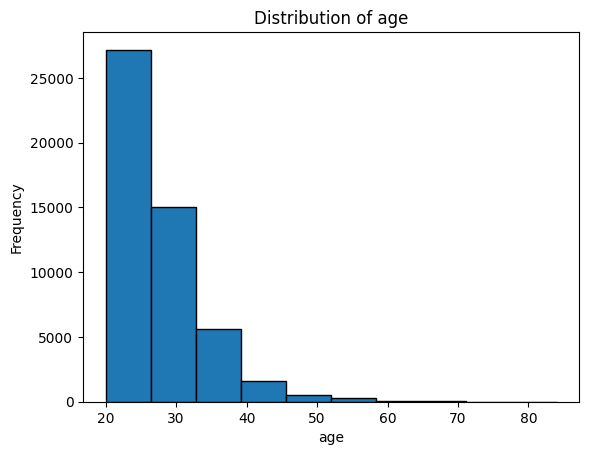

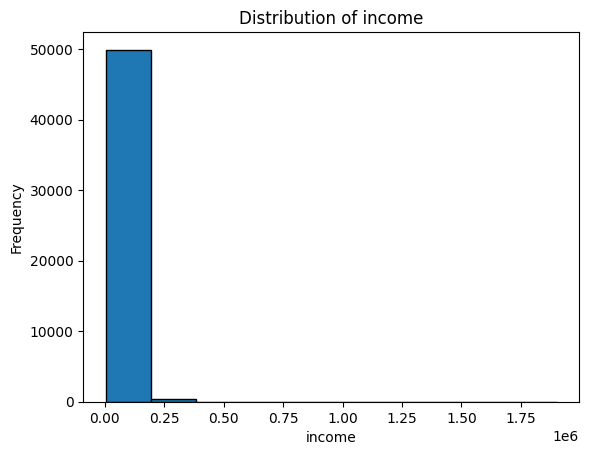

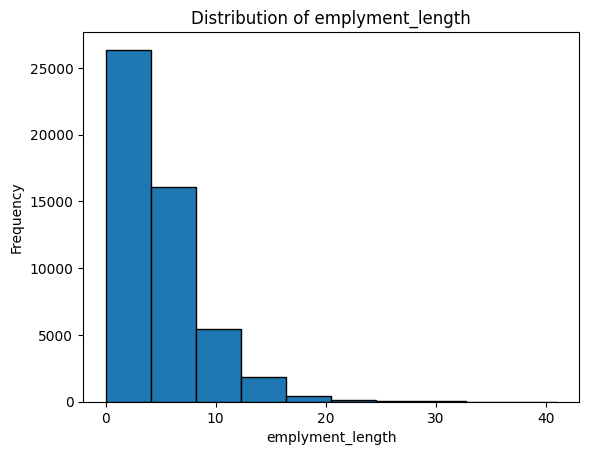

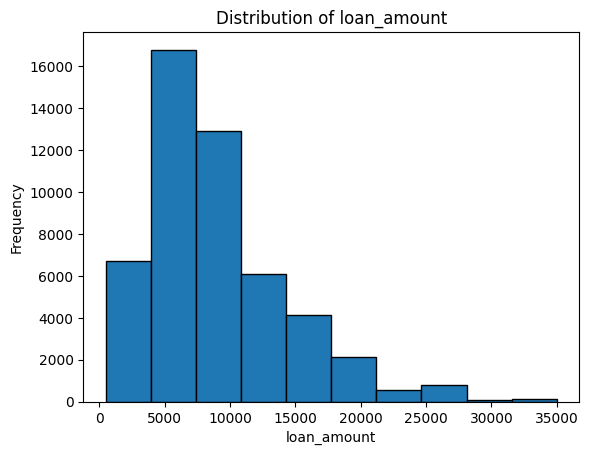

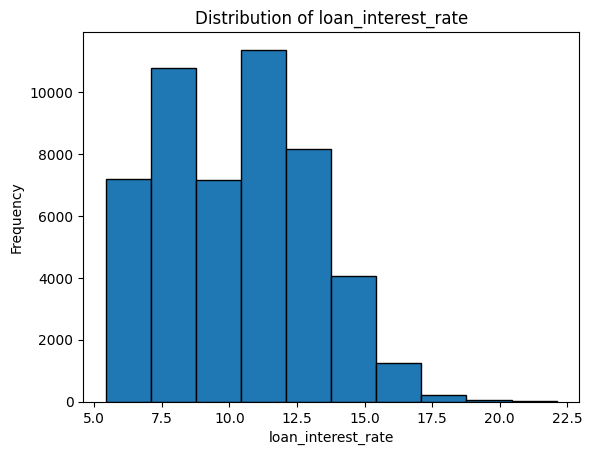

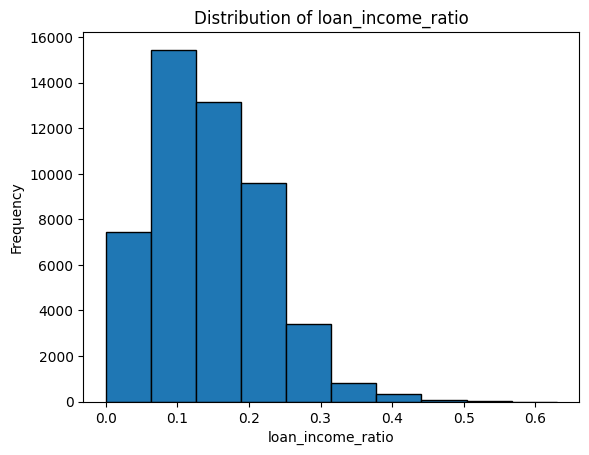

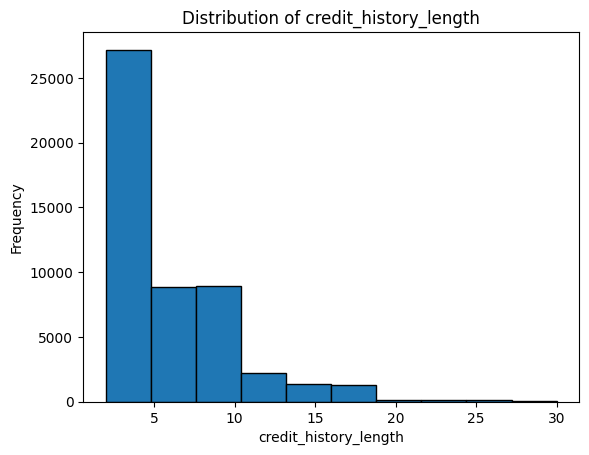

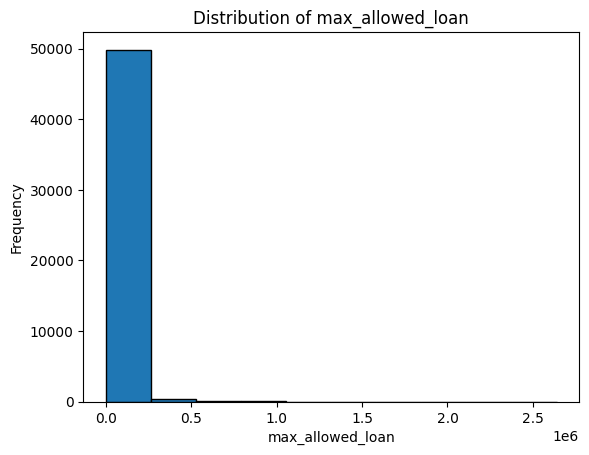

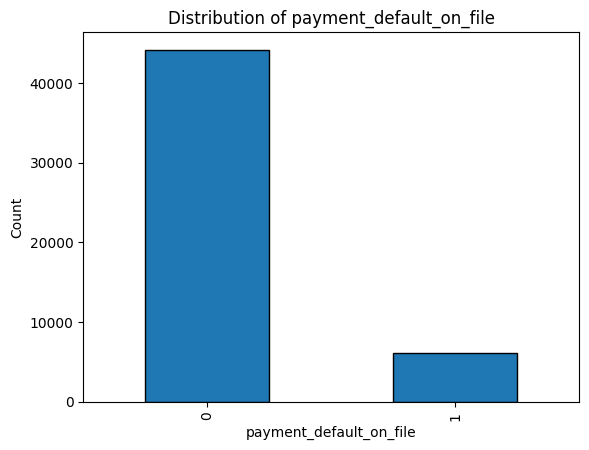

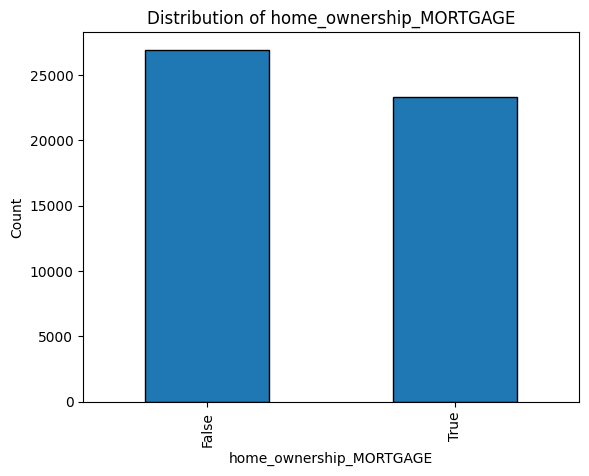

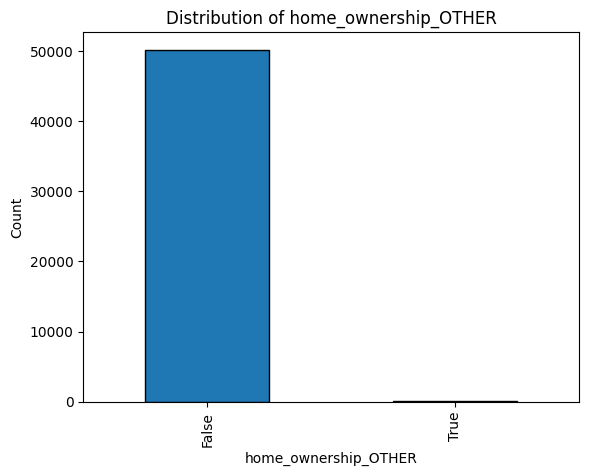

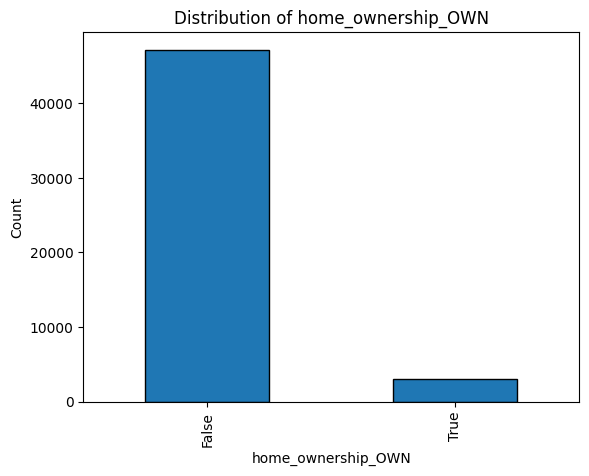

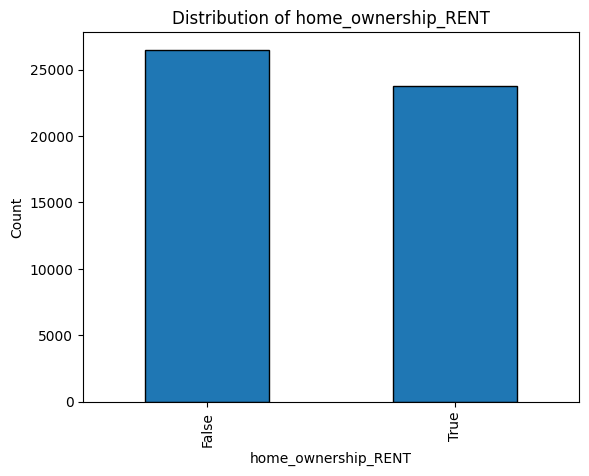

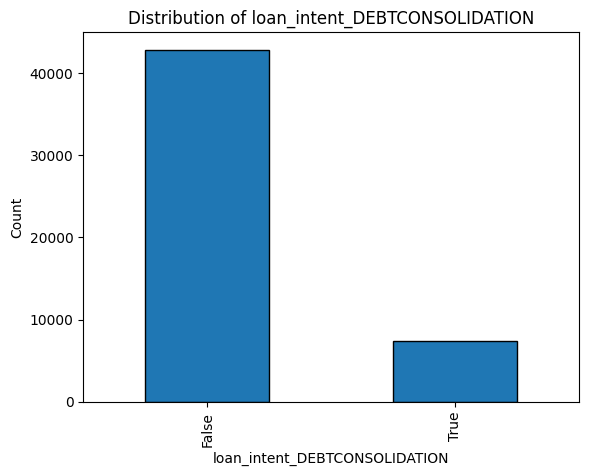

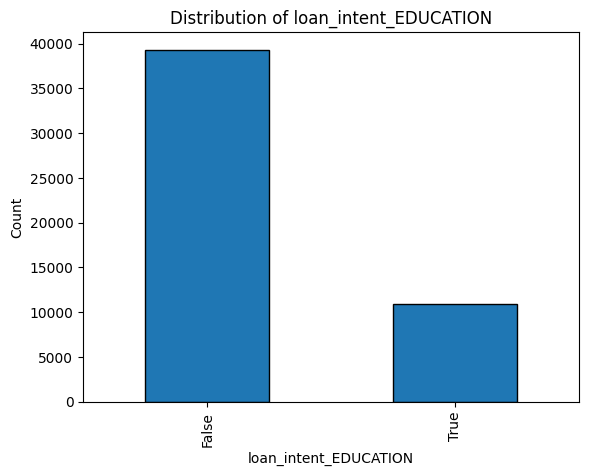

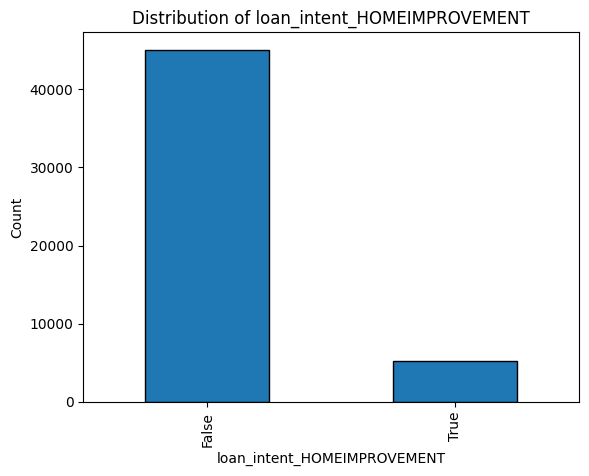

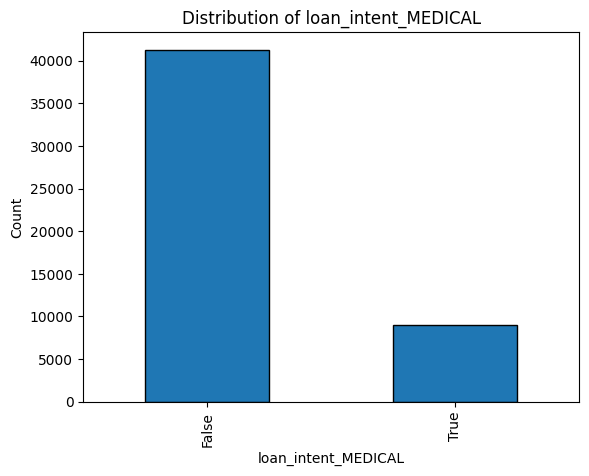

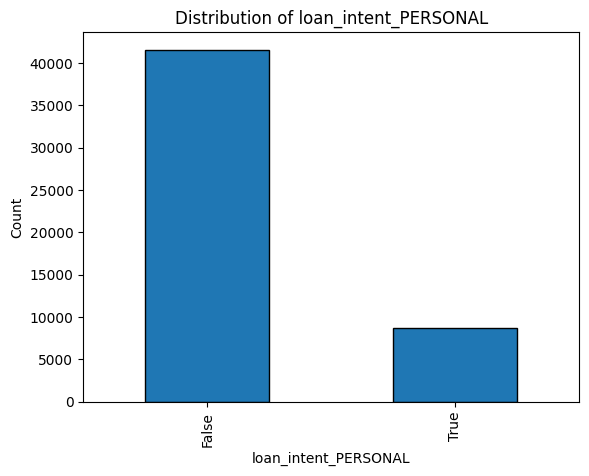

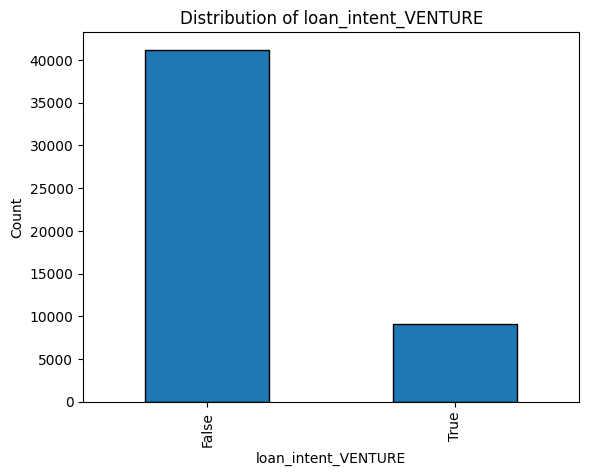

In [210]:
## Task 2
import matplotlib.pyplot as plt

# All numerical features
numeric_features = ['age', 'income', 'emplyment_length', 'loan_amount', 'loan_interest_rate', 'loan_income_ratio', 'credit_history_length', 'max_allowed_loan']


for features in numeric_features:
    df_loan_max[features].hist(edgecolor='black')
    plt.title(f'Distribution of {features}')
    plt.xlabel(features), plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()


# All encoded categorical features
encoded_features = ['payment_default_on_file', 'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE']

for features in encoded_features:
    df_loan_max[features].value_counts().plot(kind='bar', edgecolor='black'),
    plt.title(f'Distribution of {features}'),
    plt.ylabel('Count')
    plt.show()

In [211]:
# Task (3) a)
df_loan_max.describe()

,age,income,emplyment_length,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,max_allowed_loan
count,50262.00,50262.00,50262.00,50262.00,50262.00,50262.00,50262.00,50262.00,50262.00
mean,27.55,66677.80,4.86,8887.82,10.26,0.15,0.12,5.82,81393.45
std,5.96,39315.13,3.91,5327.04,2.83,0.08,0.33,4.00,58127.38
min,20.00,4200.00,0.00,500.00,5.42,0.00,0.00,2.00,232.00
25%,23.00,45000.00,2.00,5000.00,7.51,0.08,0.00,3.00,49111.00
50%,26.00,60000.00,4.00,8000.00,10.39,0.13,0.00,4.00,69411.00
75%,30.00,80000.00,7.00,12000.00,12.42,0.20,0.00,8.00,98990.00
max,84.00,1900000.00,41.00,35000.00,22.11,0.63,1.00,30.00,2638778.00


In [212]:
# Task 4
numeric_feature = ['age', 'income', 'emplyment_length', 'loan_amount', 'loan_interest_rate', 'loan_income_ratio', 'credit_history_length']

# DT Model 1
X1 = df_loan_max[numeric_feature]
# DT Model 2
X2 = df_loan_max.drop(['max_allowed_loan'], axis=1)
# Target variable for both models
y = df_loan_max['max_allowed_loan']

# Model 1 - Split the dataset in 80% Training and 20% Test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=30)

# Model 2 - Split the dataset in 80% Training and 20% Test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=30)

# Building Model 1
DT1 = DecisionTreeRegressor(random_state=30)
DT1.fit (X1_train, y1_train)

# To make predictions on the test set
y1_pred_test = DT1.predict(X1_test)

# Building Model 2
DT2 = DecisionTreeRegressor(random_state=30)
DT2.fit (X2_train, y2_train)

# To make predictions on the test set
y2_pred_test = DT2.predict(X2_test)

In [213]:
# Task (4) b) ii

# DT Model 1s dimensions
print("Model 1 - Numeric features only")
print("X1_train shape:", X1_train.shape)
print("X1_test shape:", X1_test.shape)
print("y_train shape:", y1_train.shape)
print("y_test shape:", y1_test.shape)

# DT Model 1s features
print("\nModel 1 features:")
for features in X1.columns:
  print(features)

Model 1 - Numeric features only
X1_train shape: (40209, 7)
X1_test shape: (10053, 7)
y_train shape: (40209,)
y_test shape: (10053,)

Model 1 features:
age
income
emplyment_length
loan_amount
loan_interest_rate
loan_income_ratio
credit_history_length


In [214]:
# DT Model 2s dimensions
print("Model 2 - All retained features")
print("X2_train shape:", X2_train.shape)
print("X2_test shape:", X2_test.shape)
print("y_train shape:", y2_train.shape)
print("y_test shape:", y2_test.shape)

# DT Model 2s features
print("\nModel 2 features:")
for features in X2.columns:
  print(features)

Model 2 - All retained features
X2_train shape: (40209, 18)
X2_test shape: (10053, 18)
y_train shape: (40209,)
y_test shape: (10053,)

Model 2 features:
age
income
emplyment_length
loan_amount
loan_interest_rate
loan_income_ratio
payment_default_on_file
credit_history_length
home_ownership_MORTGAGE
home_ownership_OTHER
home_ownership_OWN
home_ownership_RENT
loan_intent_DEBTCONSOLIDATION
loan_intent_EDUCATION
loan_intent_HOMEIMPROVEMENT
loan_intent_MEDICAL
loan_intent_PERSONAL
loan_intent_VENTURE


In [215]:
# Task (5)
print ('Metrics for Model 1')
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred_test))
print('R2:', metrics.r2_score(y1_test, y1_pred_test))

print('\nMetrics for Model 2')
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred_test))
print('R2:', metrics.r2_score(y2_test, y2_pred_test))

Metrics for Model 1
Mean Squared Error: 90231843.14274345
Mean Absolute Error: 1210.1543817765842
R2: 0.968818628476935

Metrics for Model 2
Mean Squared Error: 84706605.23306476
Mean Absolute Error: 1257.7632547498258
R2: 0.9707279820932905


Metrics for Pruned Regression Decision Tree
Mean Squared Error: 406429993.9921328
Mean Absolute Error: 11850.406968382764
R2: 0.8595501964784484
Root Mean Squared Error: 20160.108977684937


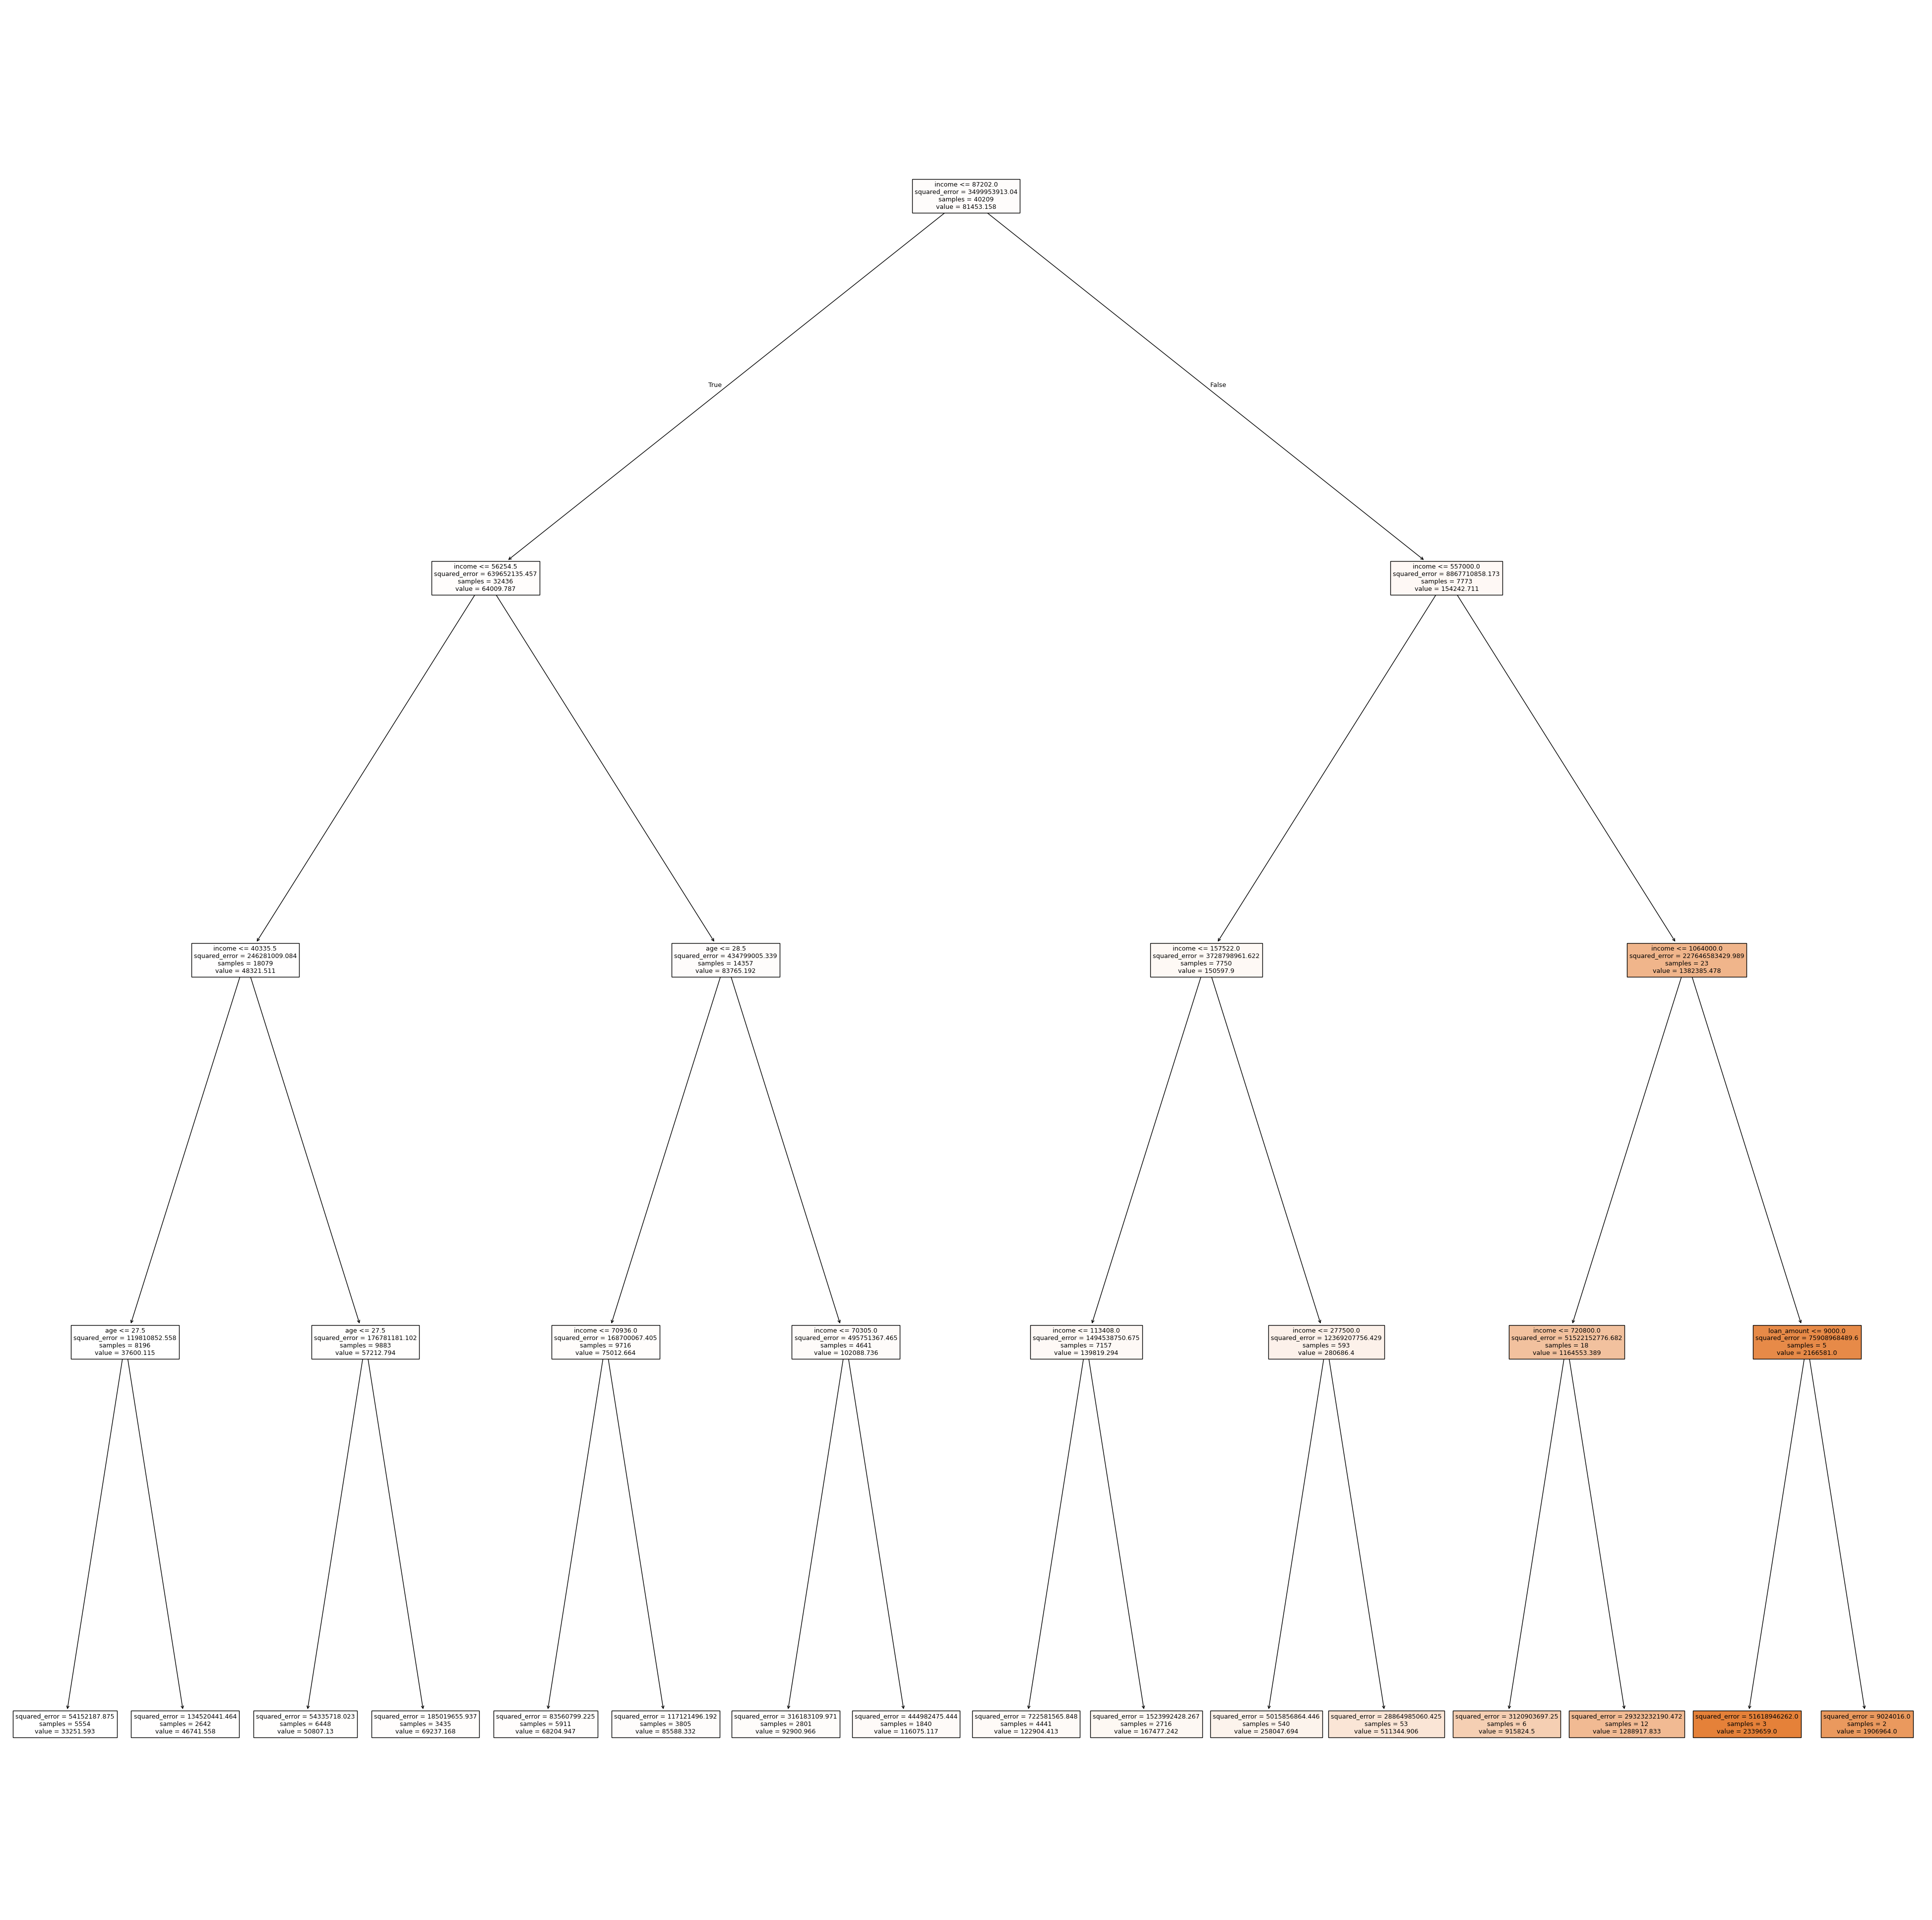

In [216]:
# Task 5 d)

# Limit the tree growth to 4 levels
DT1_pruned_regressor = DecisionTreeRegressor(max_depth=4, random_state=30)
DT1_pruned_regressor.fit(X1_train, y1_train)

# To make predictions on the test set
y1_pred_pruned = DT1_pruned_regressor.predict(X1_test)

# Plot the regression DT
pruned_Tree_model = plt.figure(figsize=(50,50))
pruned_Tree_model_Graph = tree.plot_tree(DT1_pruned_regressor, feature_names=list(X1_train.columns), filled=True)

# To save the DT graph as a png image
pruned_Tree_model.savefig("pruned_reg_decision_tree.png")

# Calculating the regression metrics for the pruned regression decision Tree
print ('Metrics for Pruned Regression Decision Tree')
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred_pruned))
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred_pruned))
print('R2:', metrics.r2_score(y1_test, y1_pred_pruned))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_pruned)))

In [217]:
## Task (5) e
# Create a new DataFrame from scratch to predict Maximum Loan Amount
data = []
data.append( {"age":56,
              "income":57000,
              "emplyment_length":15,
              "loan_amount":25700,
              "loan_interest_rate":23,
              "loan_income_ratio":0.10,
              "credit_history_length":35,
              } )
df3 = pd.DataFrame(data)

# Add a new column to `df3` with the predicted prices:
df3["Predicted Max Loan Amount"] = DT1_pruned_regressor.predict(df3)
df3.head()

,age,income,emplyment_length,loan_amount,loan_interest_rate,loan_income_ratio,credit_history_length,Predicted Max Loan Amount
0,56,57000,15,25700,23,0.10,35,92900.97
